In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [2]:
iris = pd.read_csv("C:/Users/Deepthi/Desktop/srikar/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
le.fit(iris['Species'].values)
iris['Species'] = le.transform(iris['Species'].values)

In [5]:
iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0


In [6]:
iris['Species'].unique()

array([0, 1, 2])

In [7]:
iris.pop("Id")

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [8]:
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [9]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
iris.head()
x = iris.iloc[:,:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y = iris.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 5)
knnmodel.fit(x_train, y_train)
y_predict = knnmodel.predict(x_test)
y_predict

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [16]:

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_predict)
acc

0.9777777777777777

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [18]:
tabular_cm1 = pd.DataFrame(cm, index = ["Iris-versicolor", "Iris-virginica", "Iris-setosa"], columns = ["Iris-versicolor", "Iris-virginica", "Iris-setosa"])
tabular_cm1

,Iris-versicolor,Iris-virginica,Iris-setosa
Iris-versicolor,14,0,0
Iris-virginica,0,18,0
Iris-setosa,0,1,12


In [19]:
ks = 21
mean_acc = np.zeros((ks - 1))

for i in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    y_pre = neigh.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_pre, y_test)

In [20]:
print(mean_acc)

[0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 0.97777778]


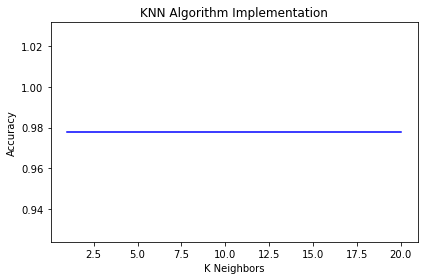

In [21]:
plt.plot(range(1,ks),mean_acc,'b')
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Algorithm Implementation")
plt.tight_layout()
plt.show()